# Num Trades All

Not used in C2Score.

In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        7849      252528      0.0000     15.0000     48.0000    182.1892    151.0000   7676.0000    426.5672 


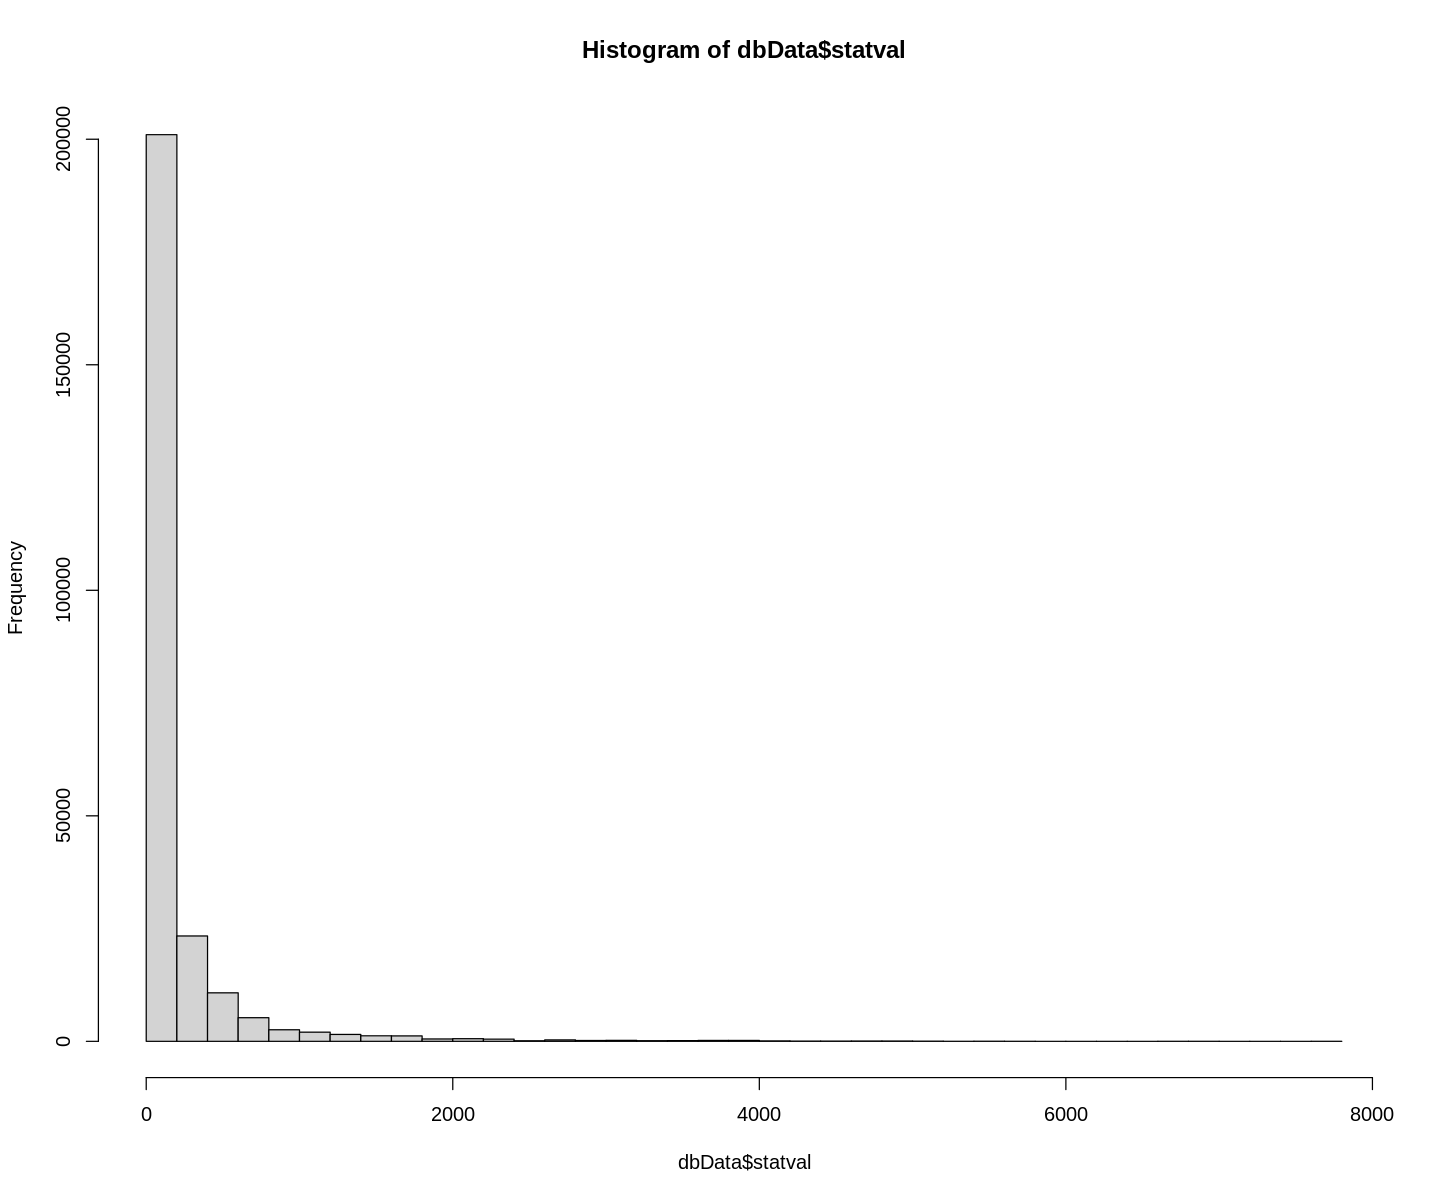

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, YYYYMMDD, statval from historical_stats_modern where statname='numtrades'")
overview(dbData)
hist(dbData$statval,breaks=50)

Too wide range for tabelation. Let's split data to two parts.

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        6538      198376     10.0000     27.0000     65.0000    138.1709    165.0000   1000.0000    177.9466 


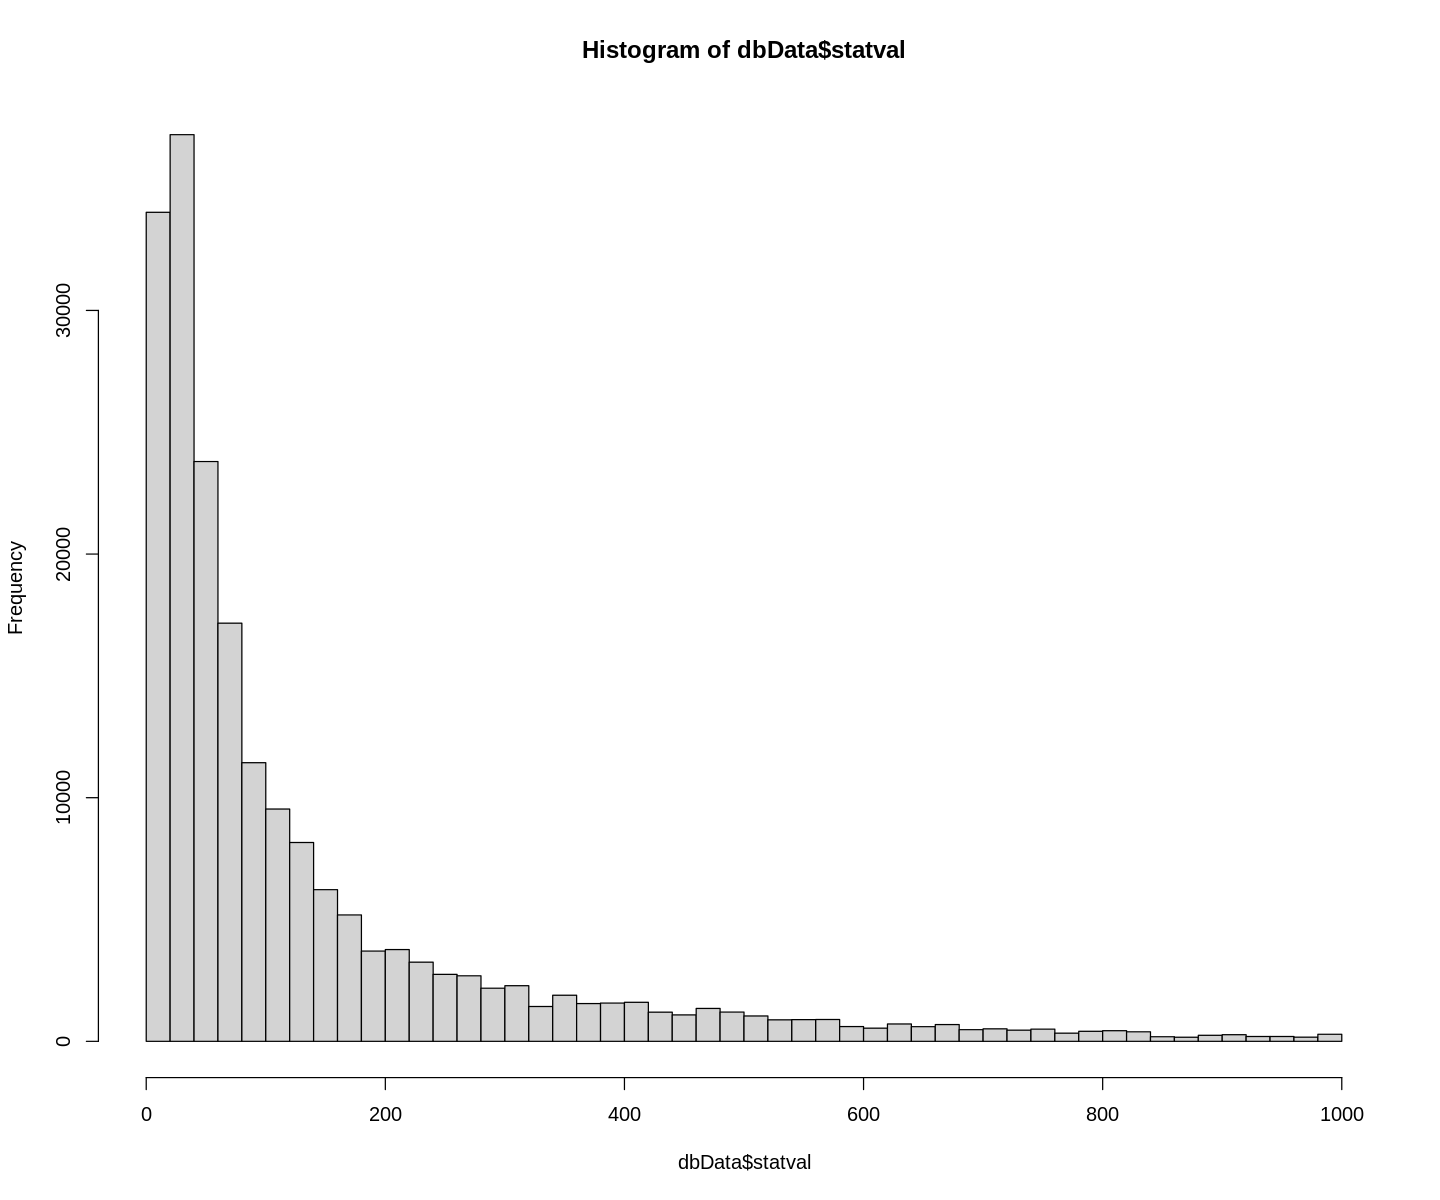

In [3]:
sql = "select systemid, YYYYMMDD, statval 
       from historical_stats_modern 
       where statname='numtrades' and statval >= 10 and statval <= 1000"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
         169        9593   1001.0000   1233.0000   1603.0000   1918.2820   2218.0000   7676.0000    966.5728 


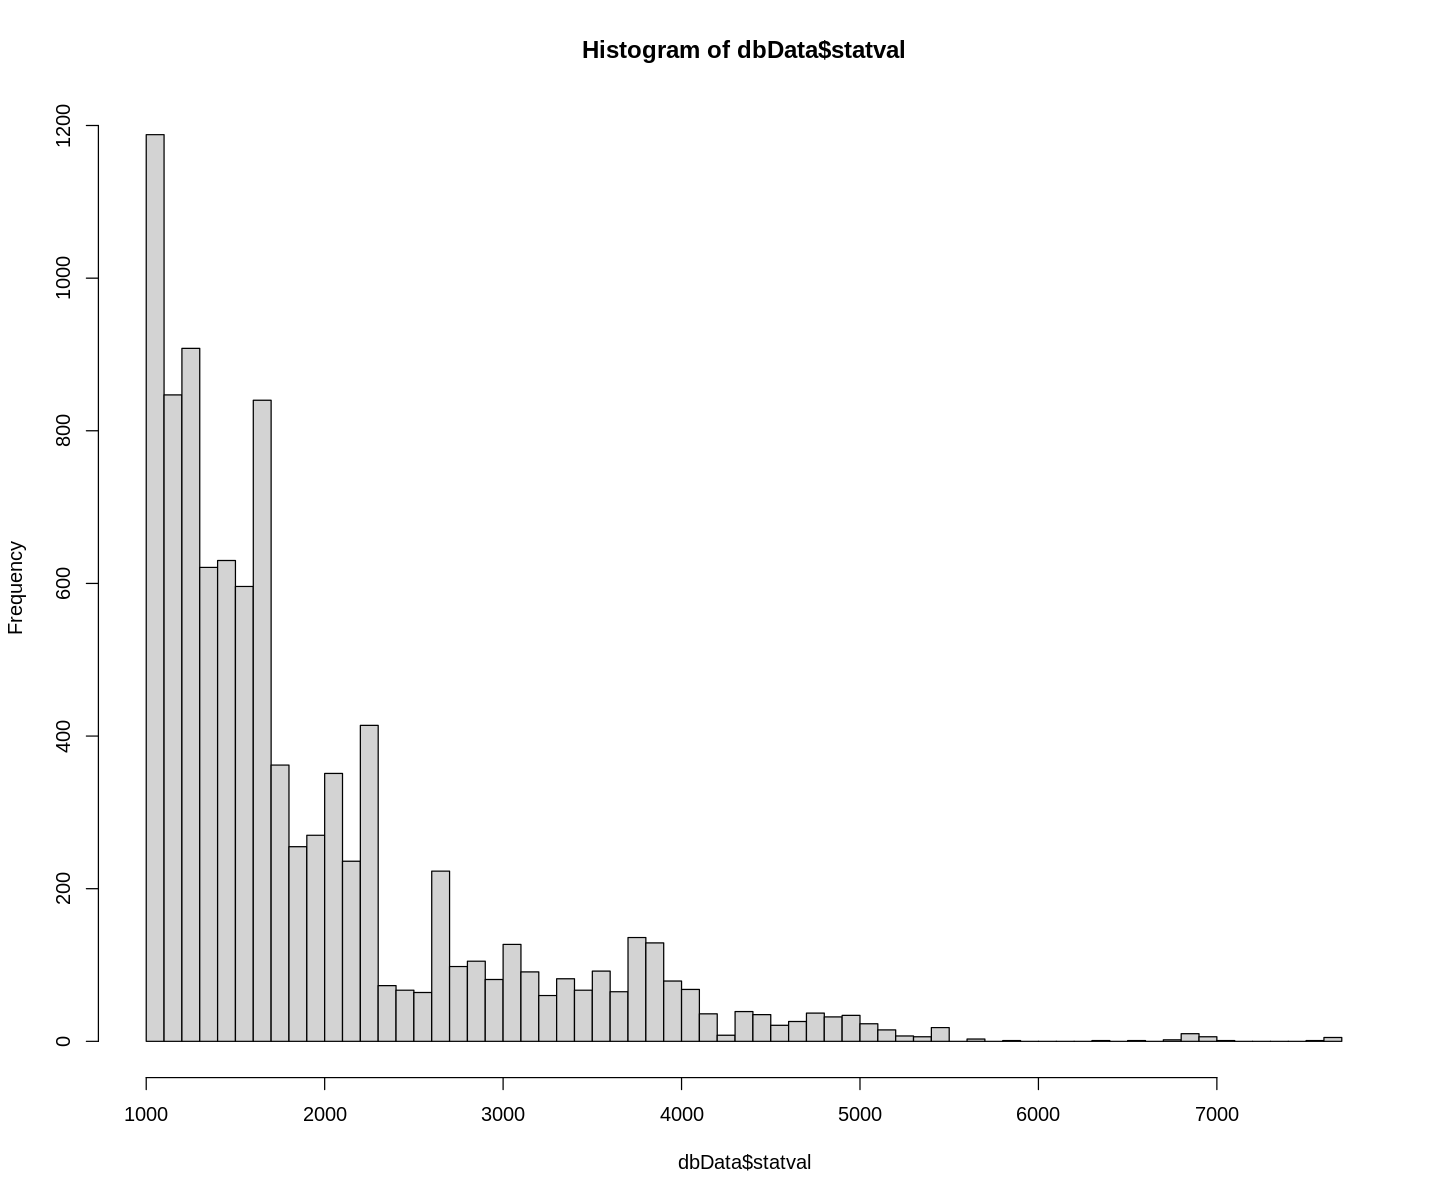

In [4]:
sql = "select systemid, YYYYMMDD, statval 
       from historical_stats_modern 
       where statname='numtrades' and statval > 1000"
dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)

**Actually, there is only 20 live systems having more than 2500 trades there.**

In [5]:
# Actually, there is only 20 live systems having more than 2500 trades there.
sql = "
select max(statval) as TradesNum, systemname, systemid
 from historical_stats_modern  
 join c2systems on c2systems.guid = systemid 
 where statname='numtrades'
 and statval > 2500
 and alive = 1
 group by systemid
 order by TradesNum"
getC2ScoreDbData(sql)

TradesNum,systemname,systemid
<dbl>,<chr>,<dbl>
2547,Honey Badger,113600500
2614,higher on light volume,133605337
2648,TwistSTM2,90020687
2749,Honey Growth Fund,117390638
2911,Carma Managed Futures,117442067
2912,MAZE RUNNER,116136972
3033,HYBRID CLOUD,115032656
3099,Ignite,106048331
3246,Futures DayTrade MTF,126018247


## From 10 to 1000 trades

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1939       69641     10.0000     29.0000     66.0000    132.1604    158.0000   1000.0000    169.7916 


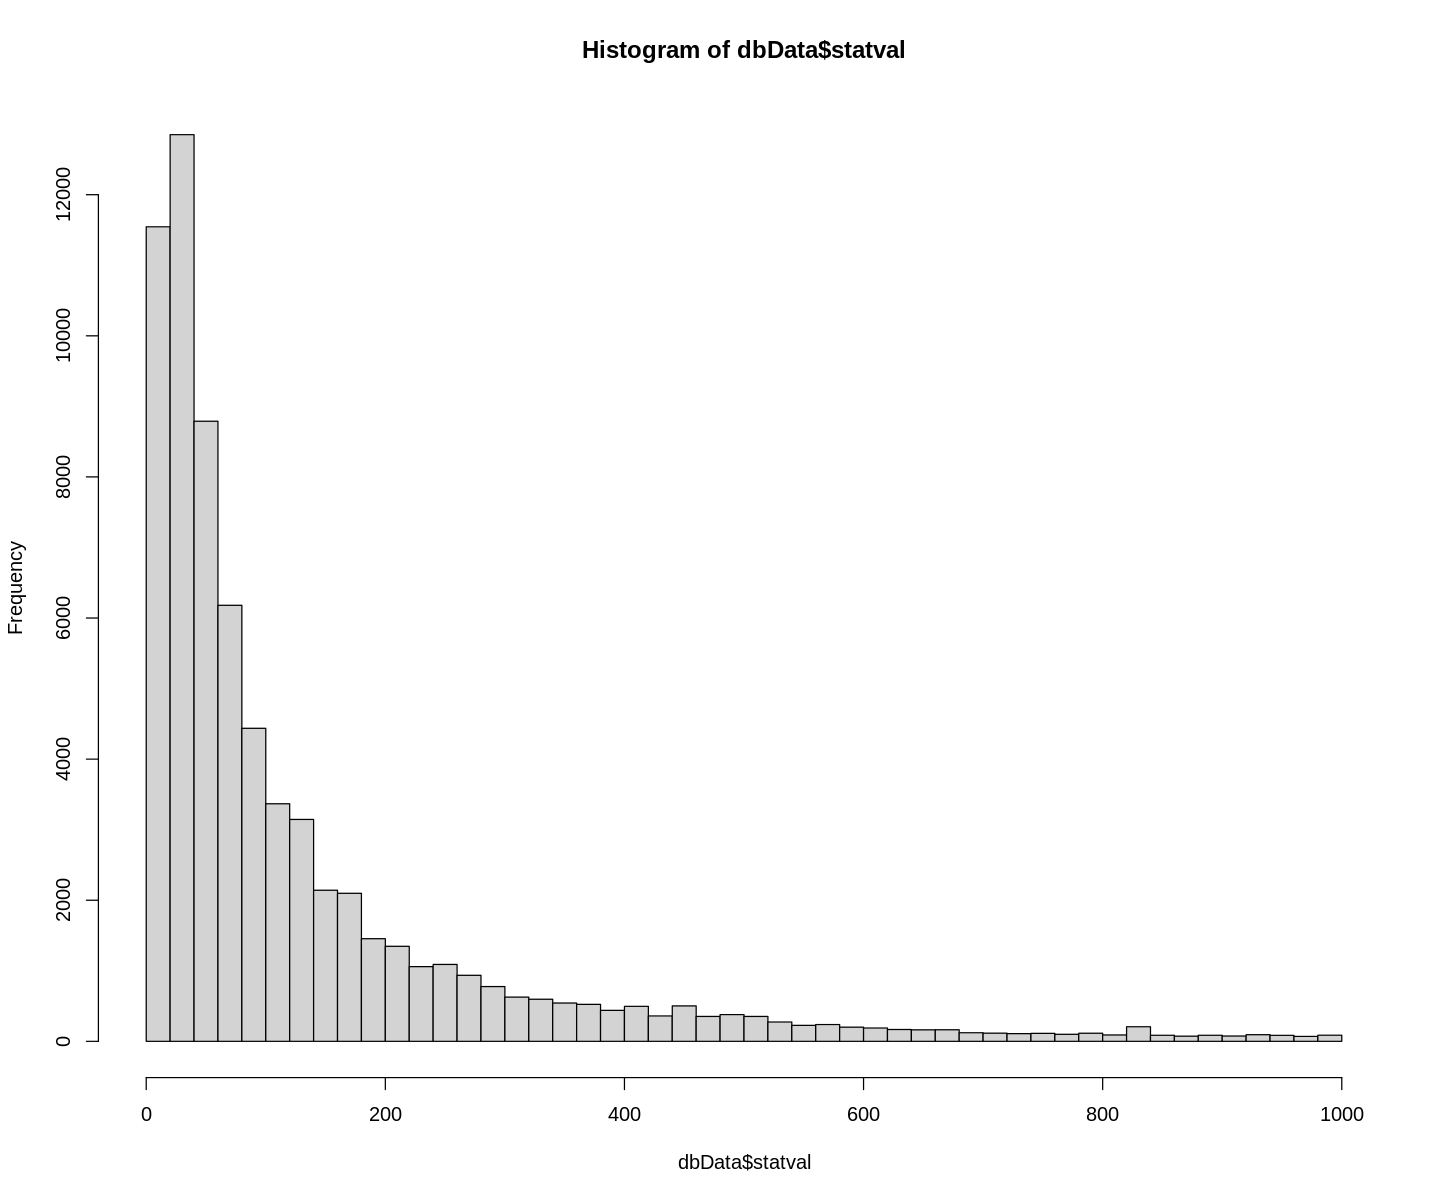

In [6]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where 
    statname='numtrades' 
    and statval >= 10
    and statval <= 1000"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1939       69641     10.0000     29.0000     66.0000    132.1604    158.0000   1000.0000    169.7916 



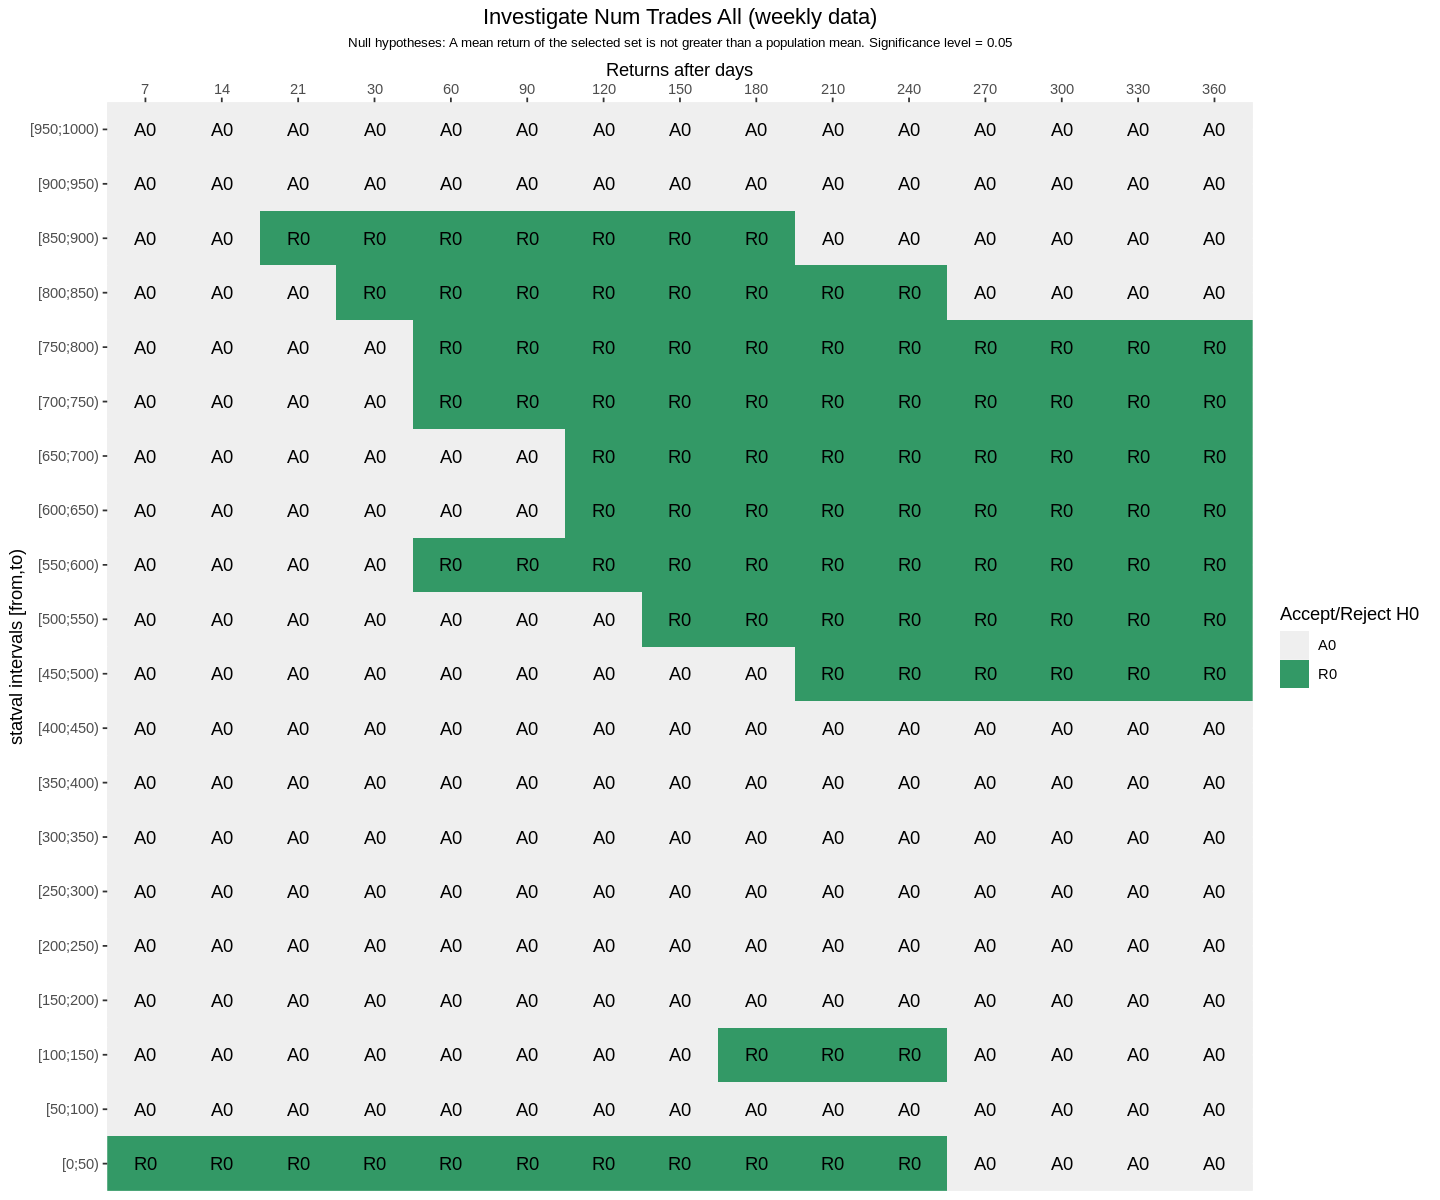

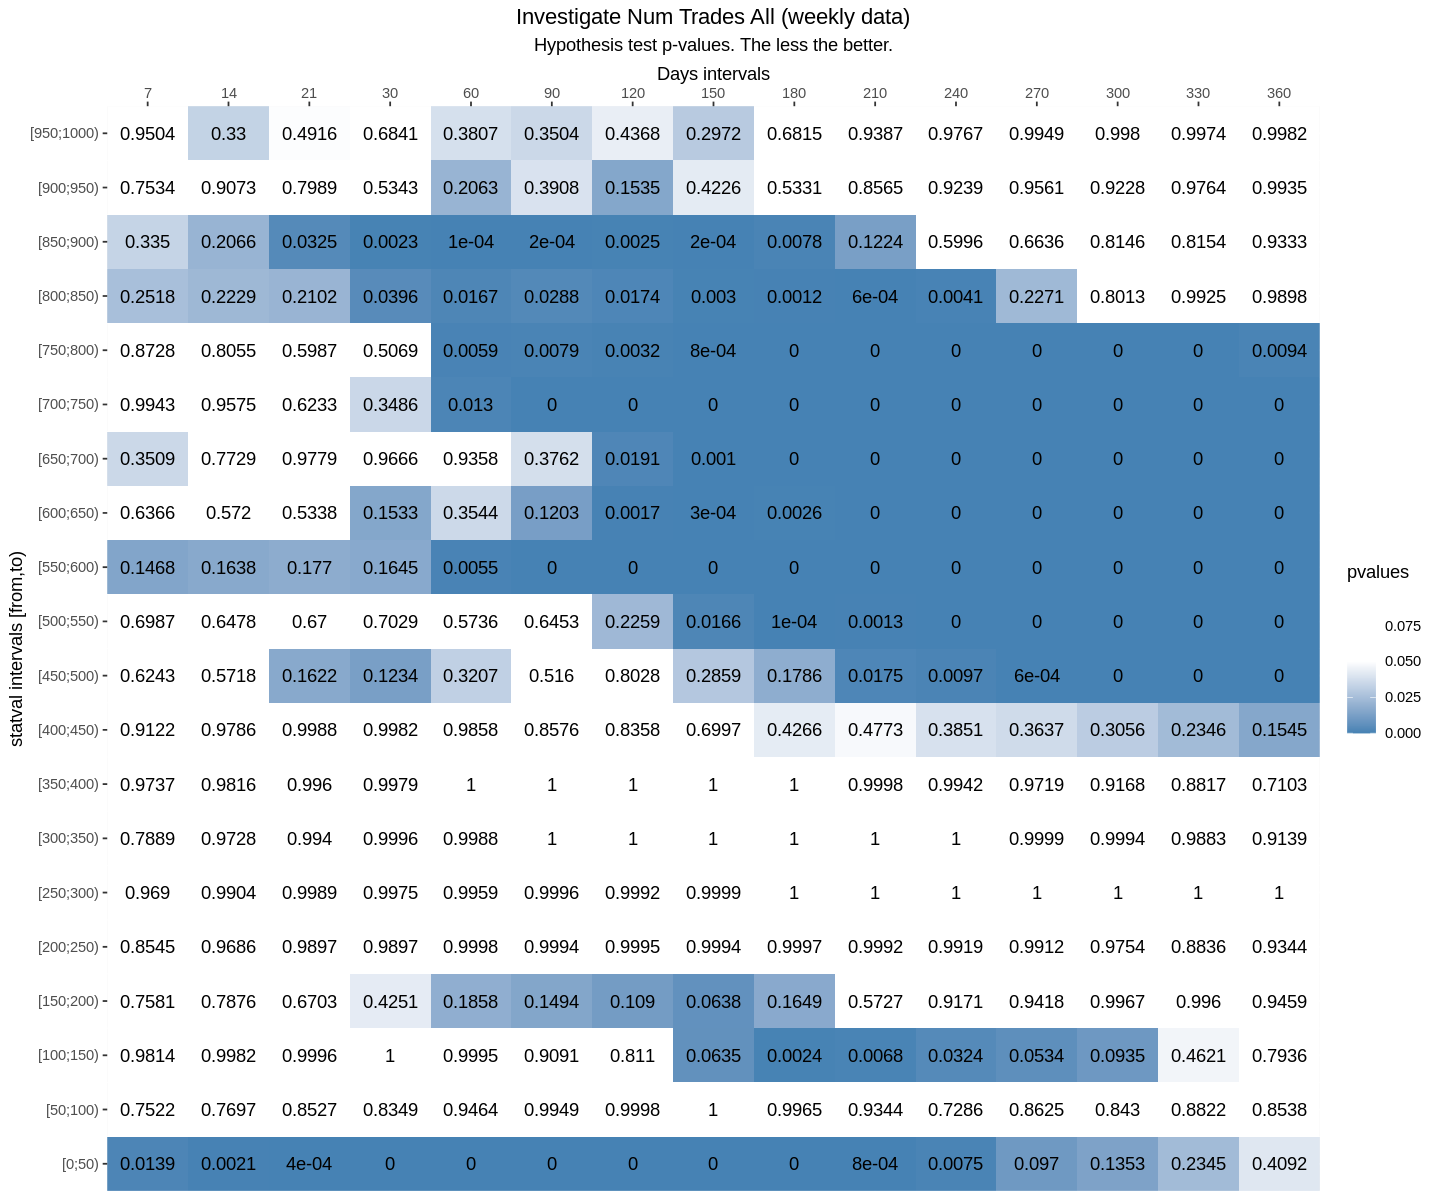

In [7]:
experiment = list(
  name = "Num Trades up to 1000",
  description = "Investigate Num Trades All (weekly data)",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 1000, by = 50))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


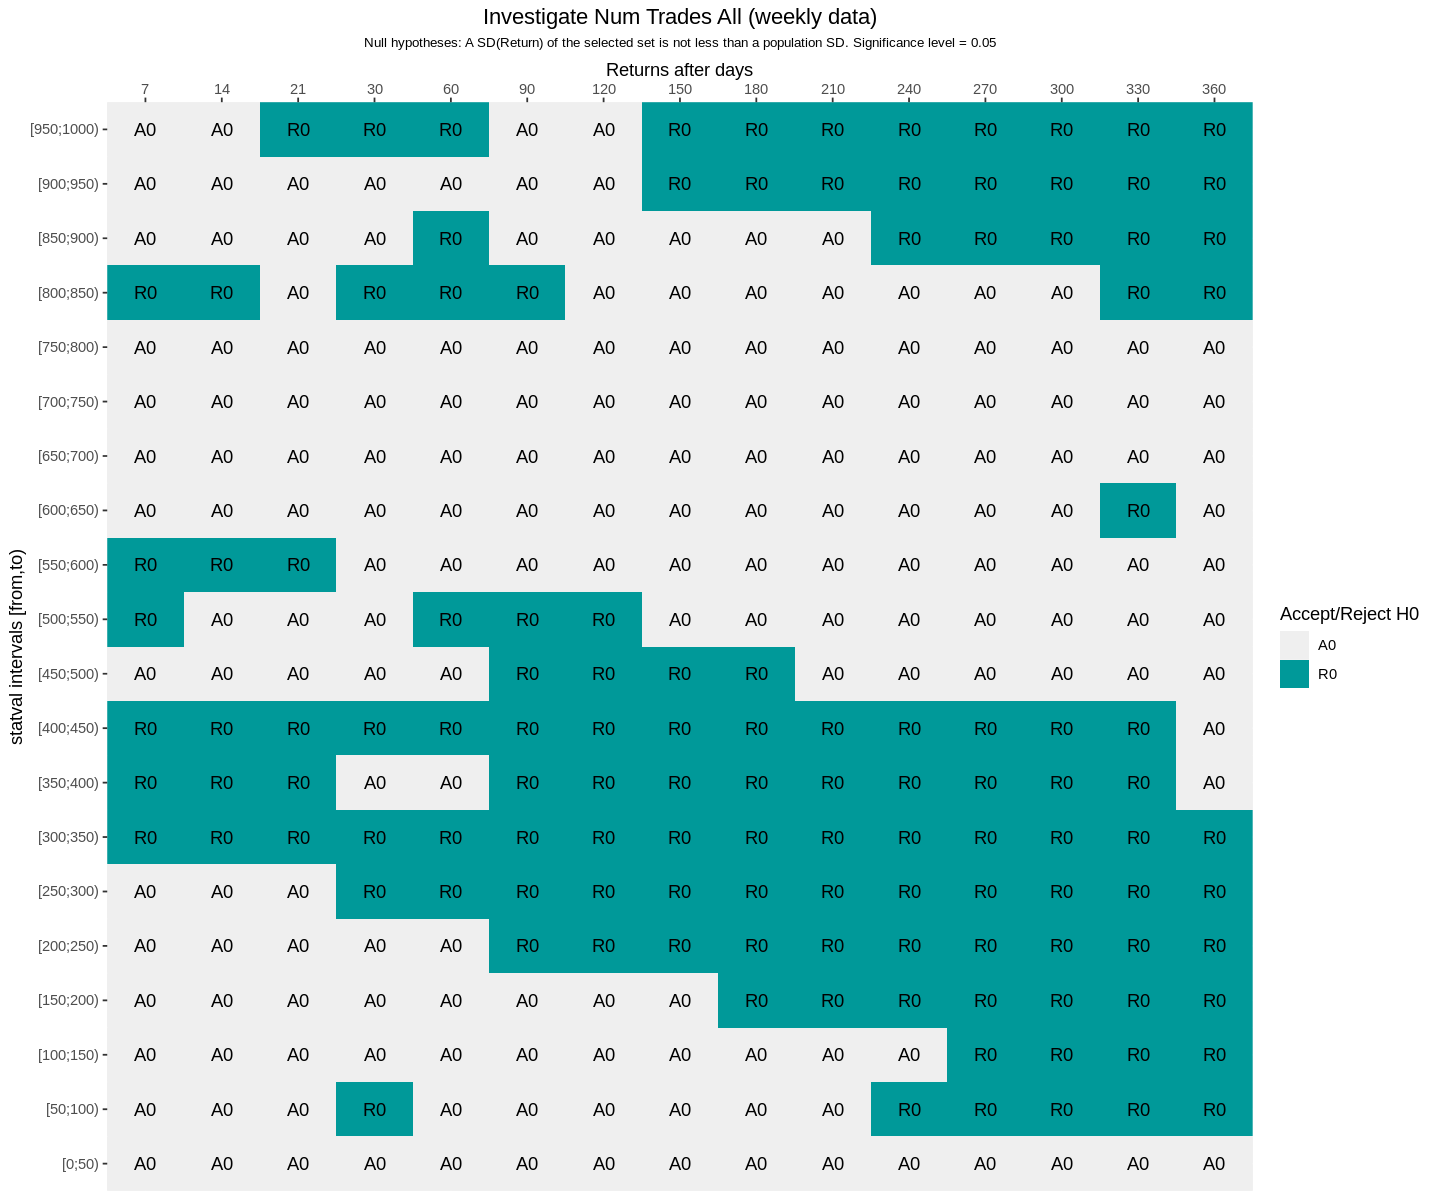

In [8]:
showSDLessHypothesisTest(experiment, result)

In [9]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
950 <= statval < 1000,184,175,169,161,145,126,119,109,100,90,86,81,74,70,69
900 <= statval < 950,213,211,208,203,175,148,119,108,99,94,85,79,71,71,66
850 <= statval < 900,203,197,191,188,173,165,149,135,117,100,92,87,83,76,74
800 <= statval < 850,328,320,313,301,271,250,227,215,204,199,176,155,141,131,121
750 <= statval < 800,266,260,252,245,222,194,168,150,133,128,127,112,103,90,81
700 <= statval < 750,269,259,252,245,214,194,178,159,145,132,127,117,107,104,91
650 <= statval < 700,357,344,331,313,256,217,190,163,143,127,111,105,93,81,80
600 <= statval < 650,429,419,406,390,345,298,252,215,183,162,152,142,139,130,113
550 <= statval < 600,538,527,517,500,447,410,373,325,283,252,227,202,179,165,156



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



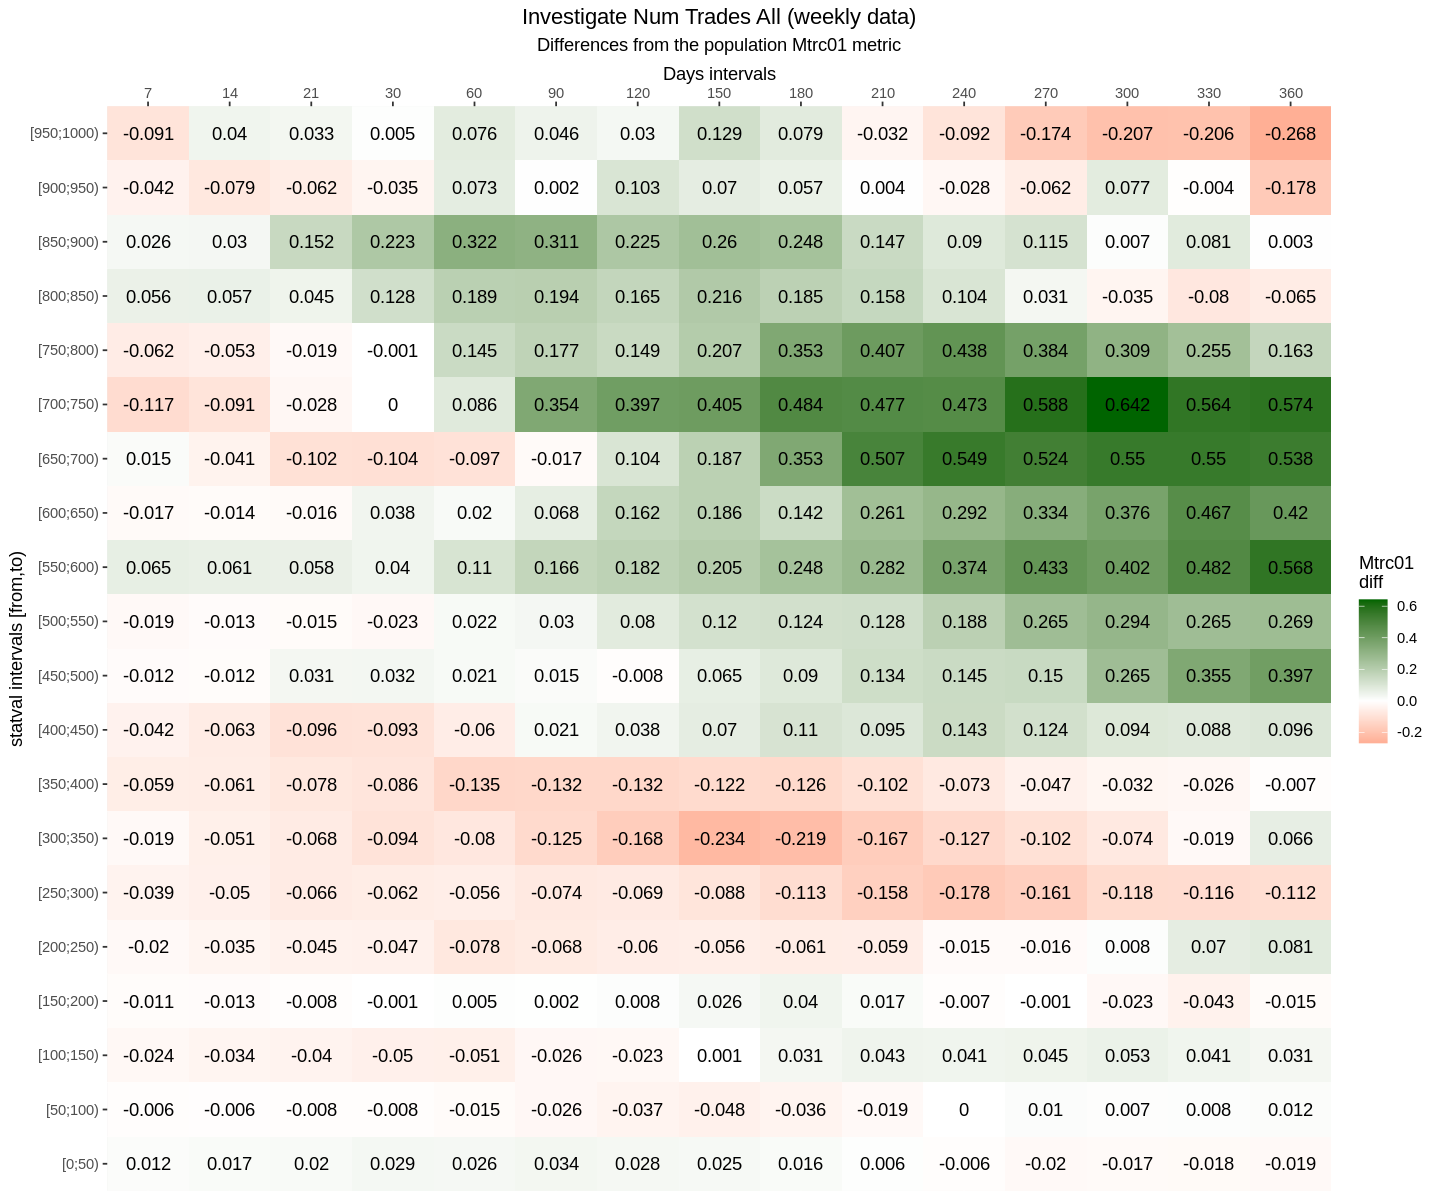

In [10]:
showMetricDifferences(experiment, result)

In [11]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
950 <= statval < 1000,47,44,42,38,35,24,23,19,18,15,13,13,11,11,10
900 <= statval < 950,54,53,52,50,43,38,28,26,22,20,18,17,13,13,11
850 <= statval < 900,58,56,52,51,42,38,31,27,24,21,16,15,13,12,10
800 <= statval < 850,66,63,63,58,48,43,33,29,25,25,23,20,17,16,14
750 <= statval < 800,66,65,61,57,51,45,36,32,27,24,24,19,18,16,13
700 <= statval < 750,77,74,71,67,55,47,41,33,30,26,25,23,19,18,15
650 <= statval < 700,87,83,80,76,66,56,46,37,33,27,23,23,22,16,15
600 <= statval < 650,96,95,91,85,74,62,52,44,37,29,27,23,21,19,19
550 <= statval < 600,107,106,105,101,82,72,65,55,45,39,32,29,25,22,21


### Discussion
 
From 10 to 1000 trades.............................

## From 1000 to 2500 trades

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
          65        2650   1000.0000   1200.2500   1412.5000   1504.7298   1751.7500   2477.0000    375.2706 


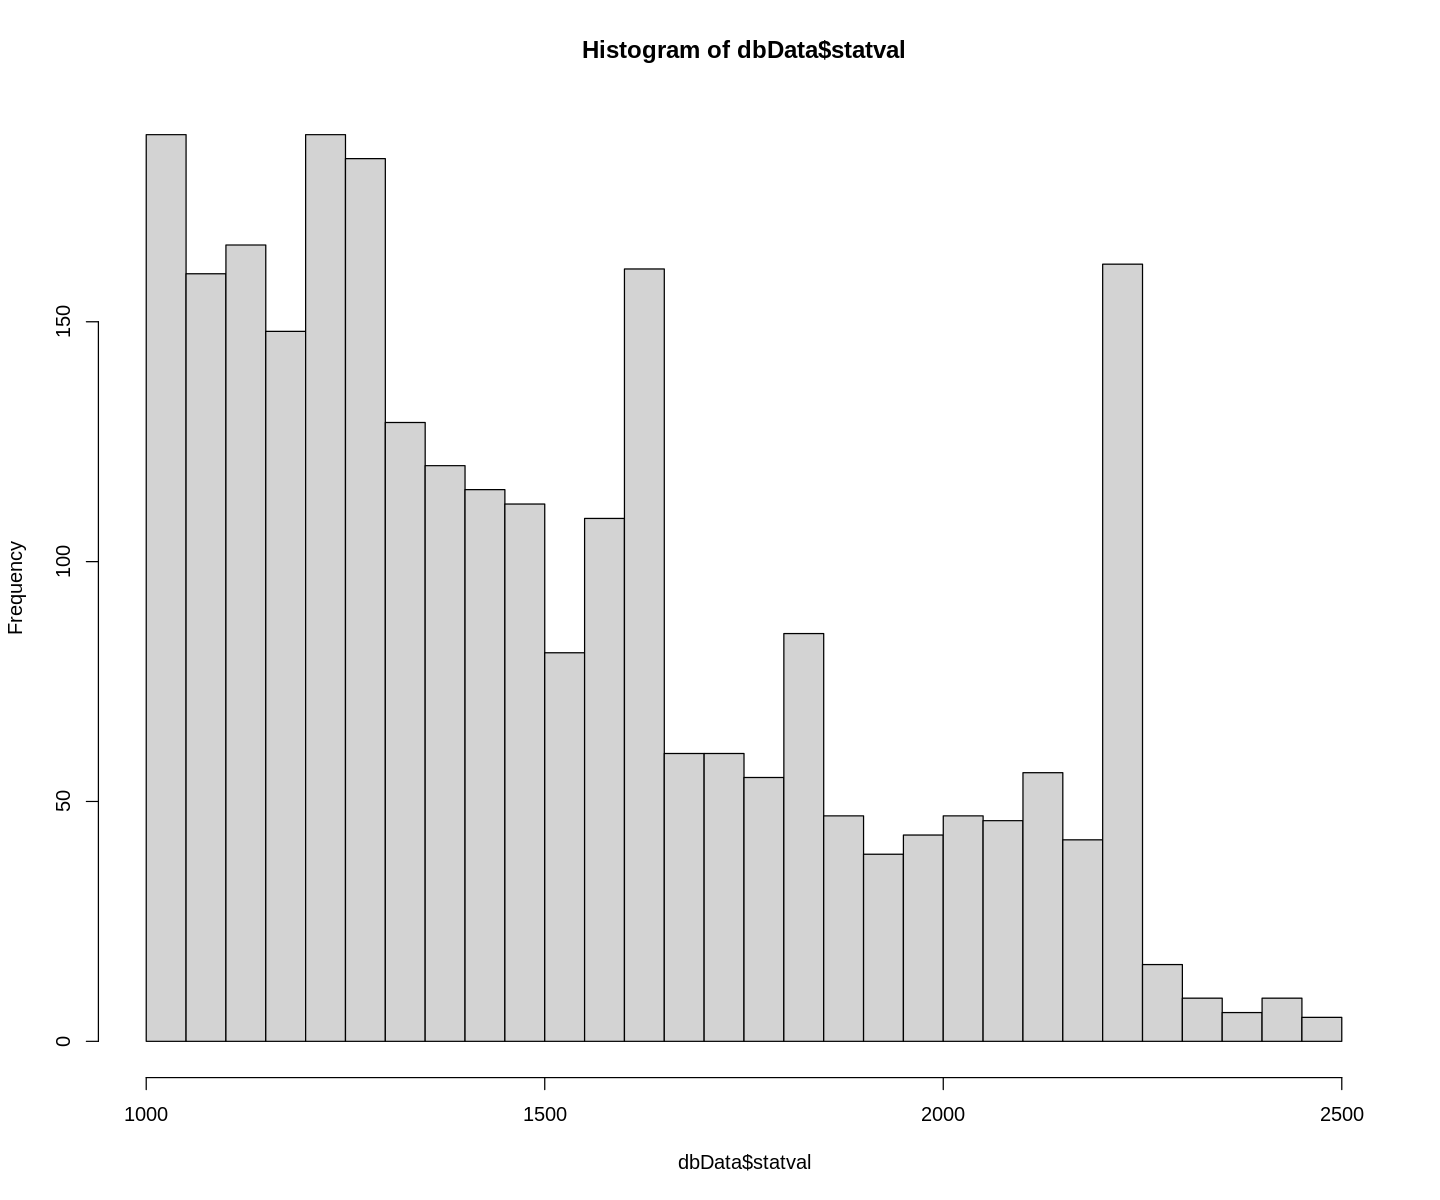

In [12]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.YYYYMMDD = cast(date_format(DateStart,'%Y%m%d') AS UNSIGNED)
 where 
    statname='numtrades' 
    and statval >= 1000
    and statval <= 2500"

dbData = getC2ScoreDbData(sql)
overview(dbData)
hist(dbData$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
          65        2650   1000.0000   1200.2500   1412.5000   1504.7298   1751.7500   2477.0000    375.2706 



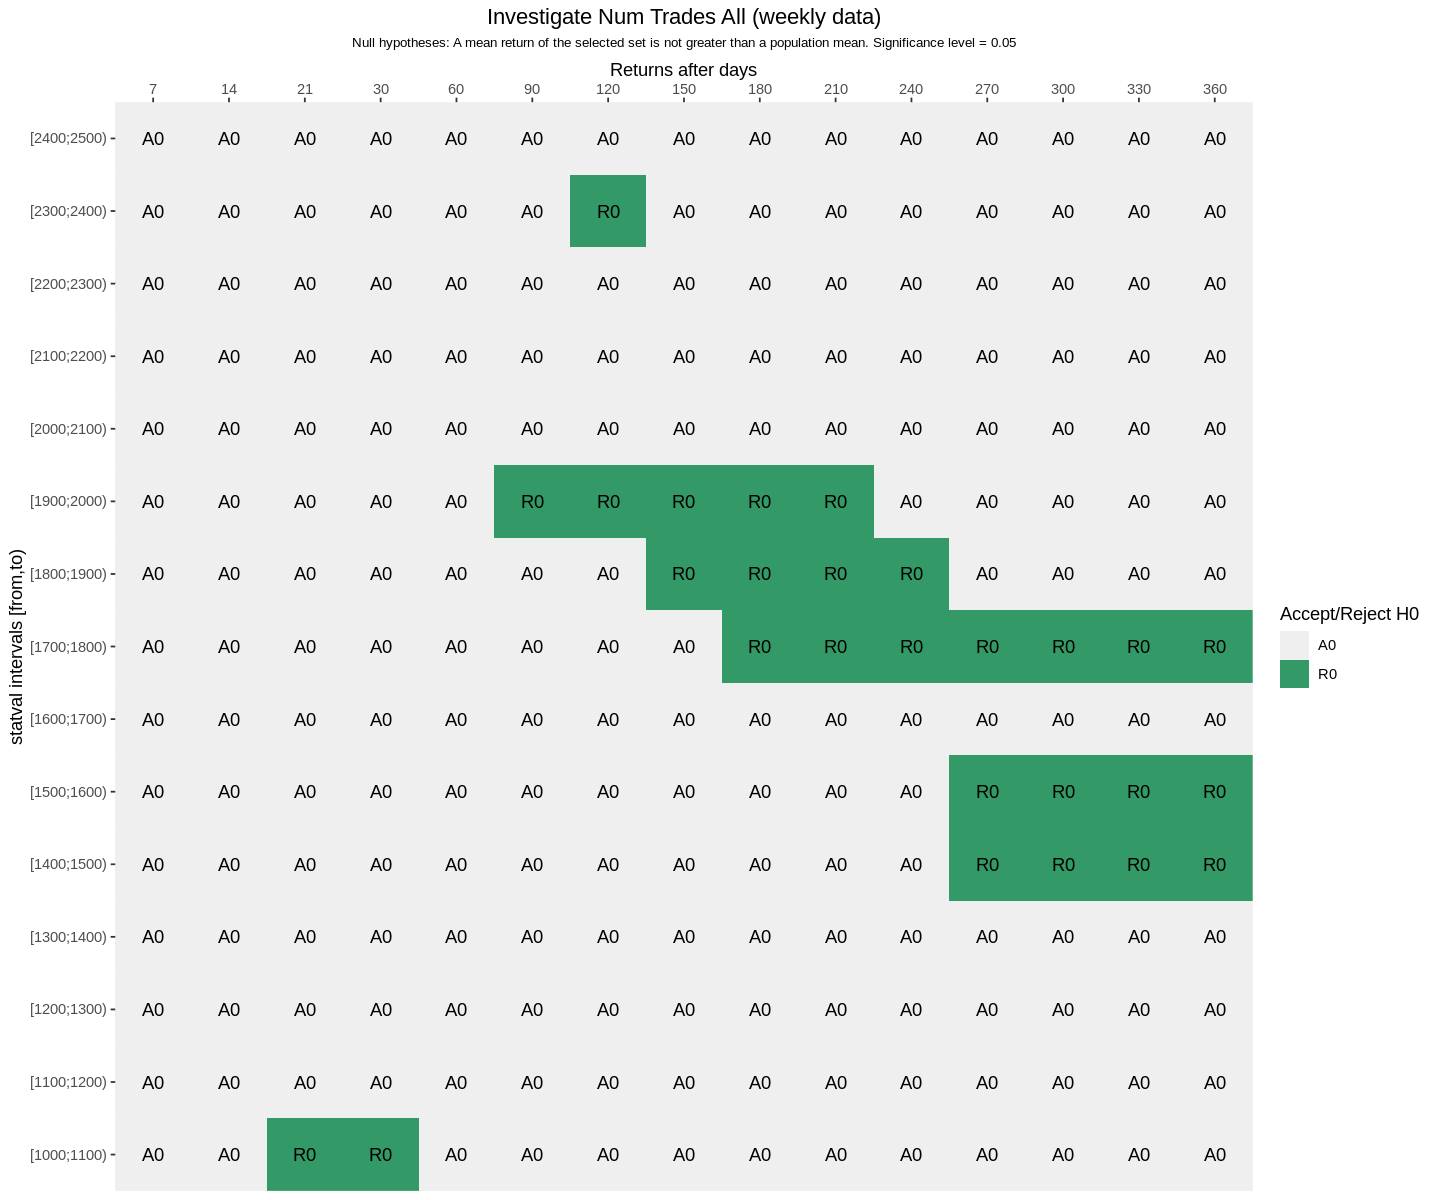

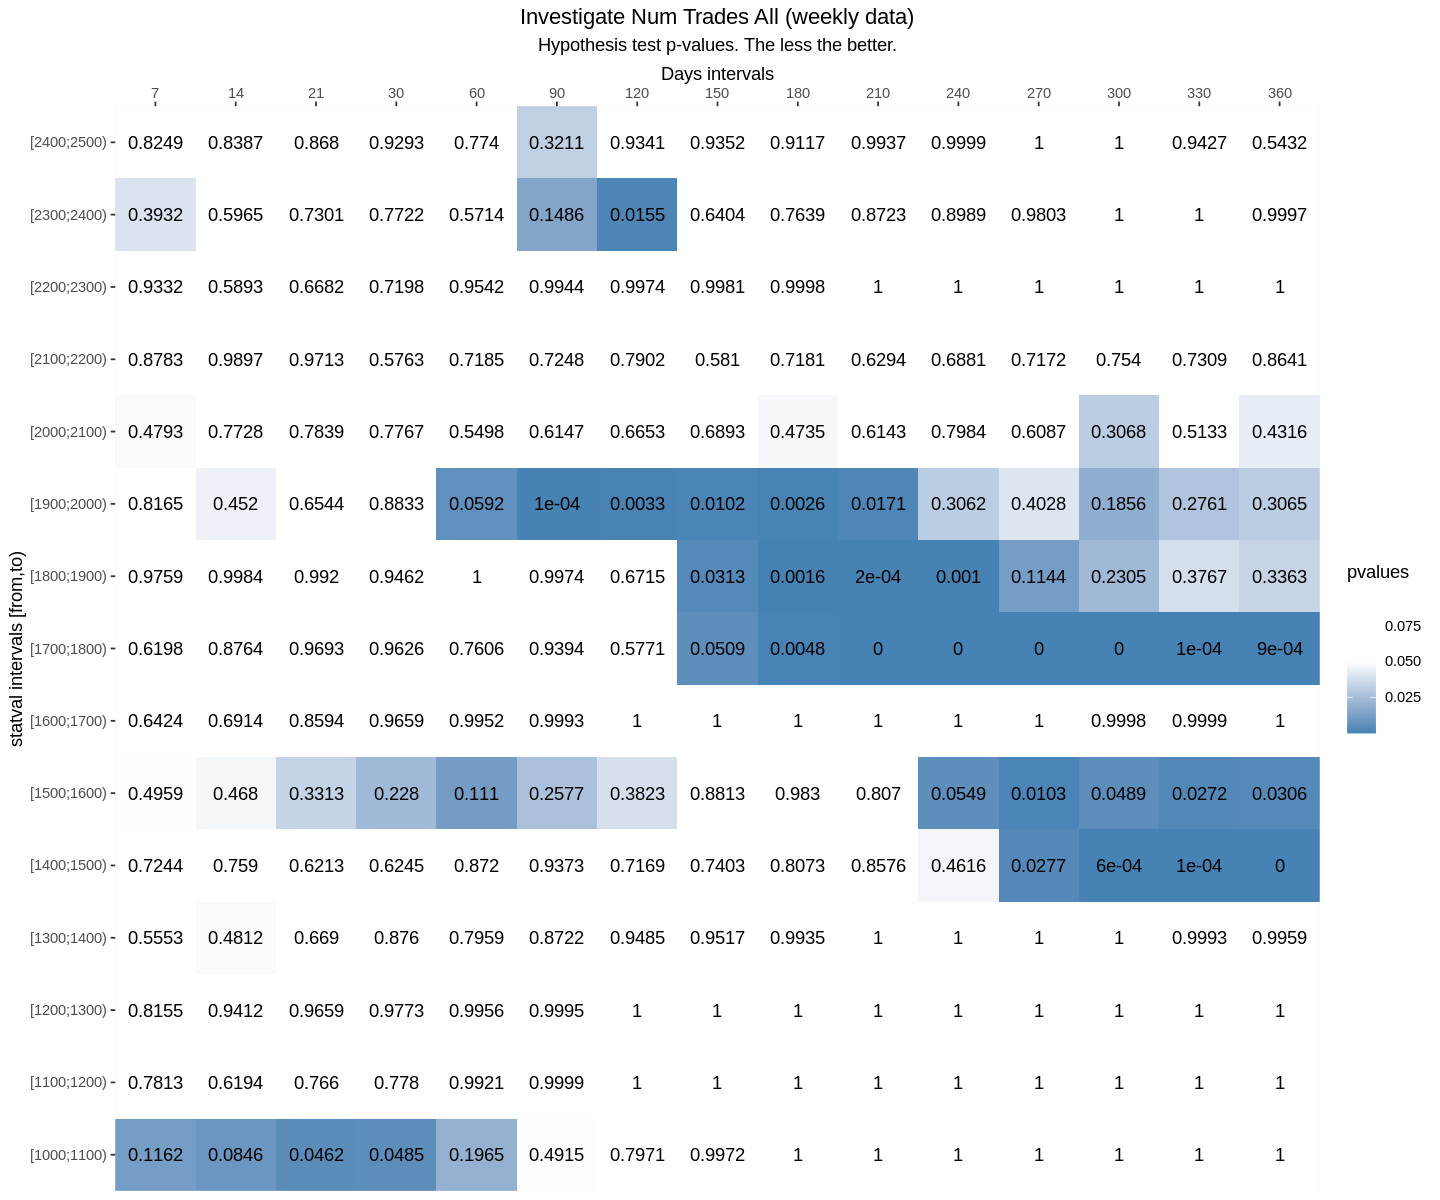

In [13]:
experiment = list(
  name = "Num Trades between 1000 and 2500",
  description = "Investigate Num Trades All (weekly data)",
  sqlText = sql, # the latest sql above
  attributeName = "statval",
  attributeSteps = seq(from = 1000, to = 2500, by = 100))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


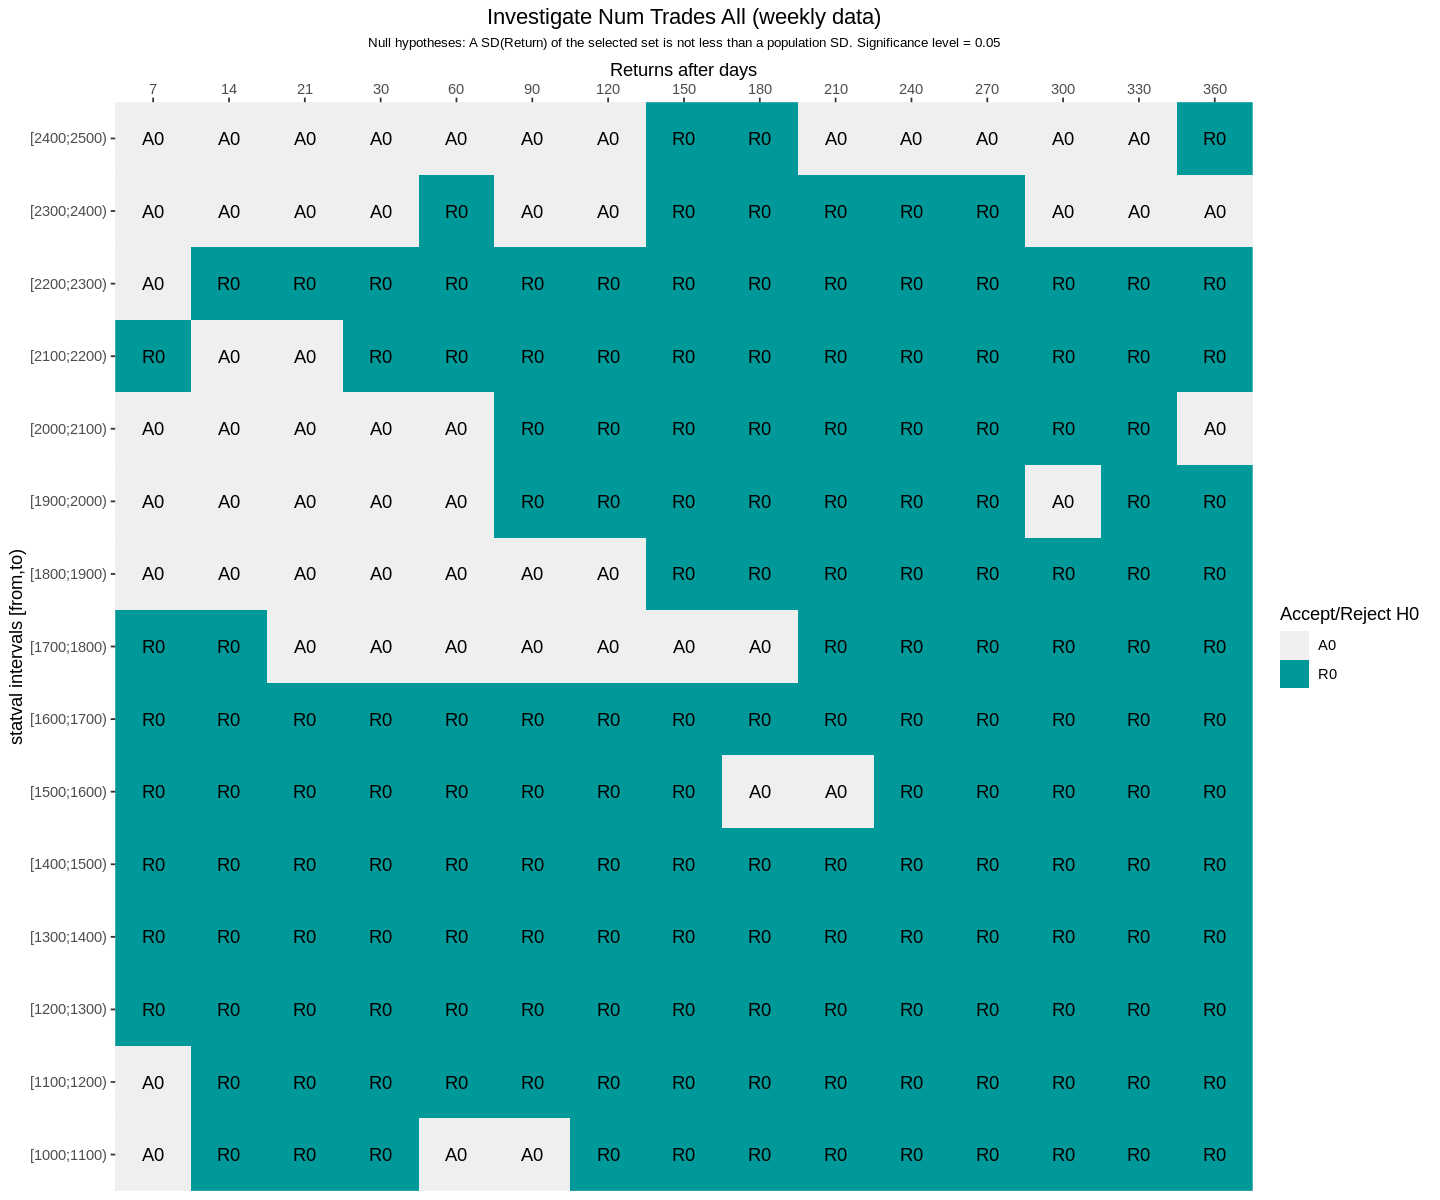

In [14]:
showSDLessHypothesisTest(experiment, result)    

In [15]:
showObservationsCounts(experiment, result)


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2400 <= statval < 2500,14,14,13,12,11,11,9,9,9,9,9,9,7,3,2
2300 <= statval < 2400,16,16,16,16,13,13,13,8,8,8,8,8,8,8,5
2200 <= statval < 2300,172,166,162,157,141,133,129,125,117,113,109,104,100,96,92
2100 <= statval < 2200,94,91,86,80,59,37,20,14,9,9,9,9,9,9,9
2000 <= statval < 2100,91,88,86,84,74,64,54,36,16,7,7,7,7,7,7
1900 <= statval < 2000,81,80,79,77,70,60,57,56,50,34,18,9,8,8,8
1800 <= statval < 1900,130,128,125,123,116,108,94,77,68,62,52,37,26,15,9
1700 <= statval < 1800,113,112,111,109,99,93,86,81,78,72,67,61,50,47,41
1600 <= statval < 1700,216,212,210,210,208,206,201,192,180,174,170,165,160,146,134



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



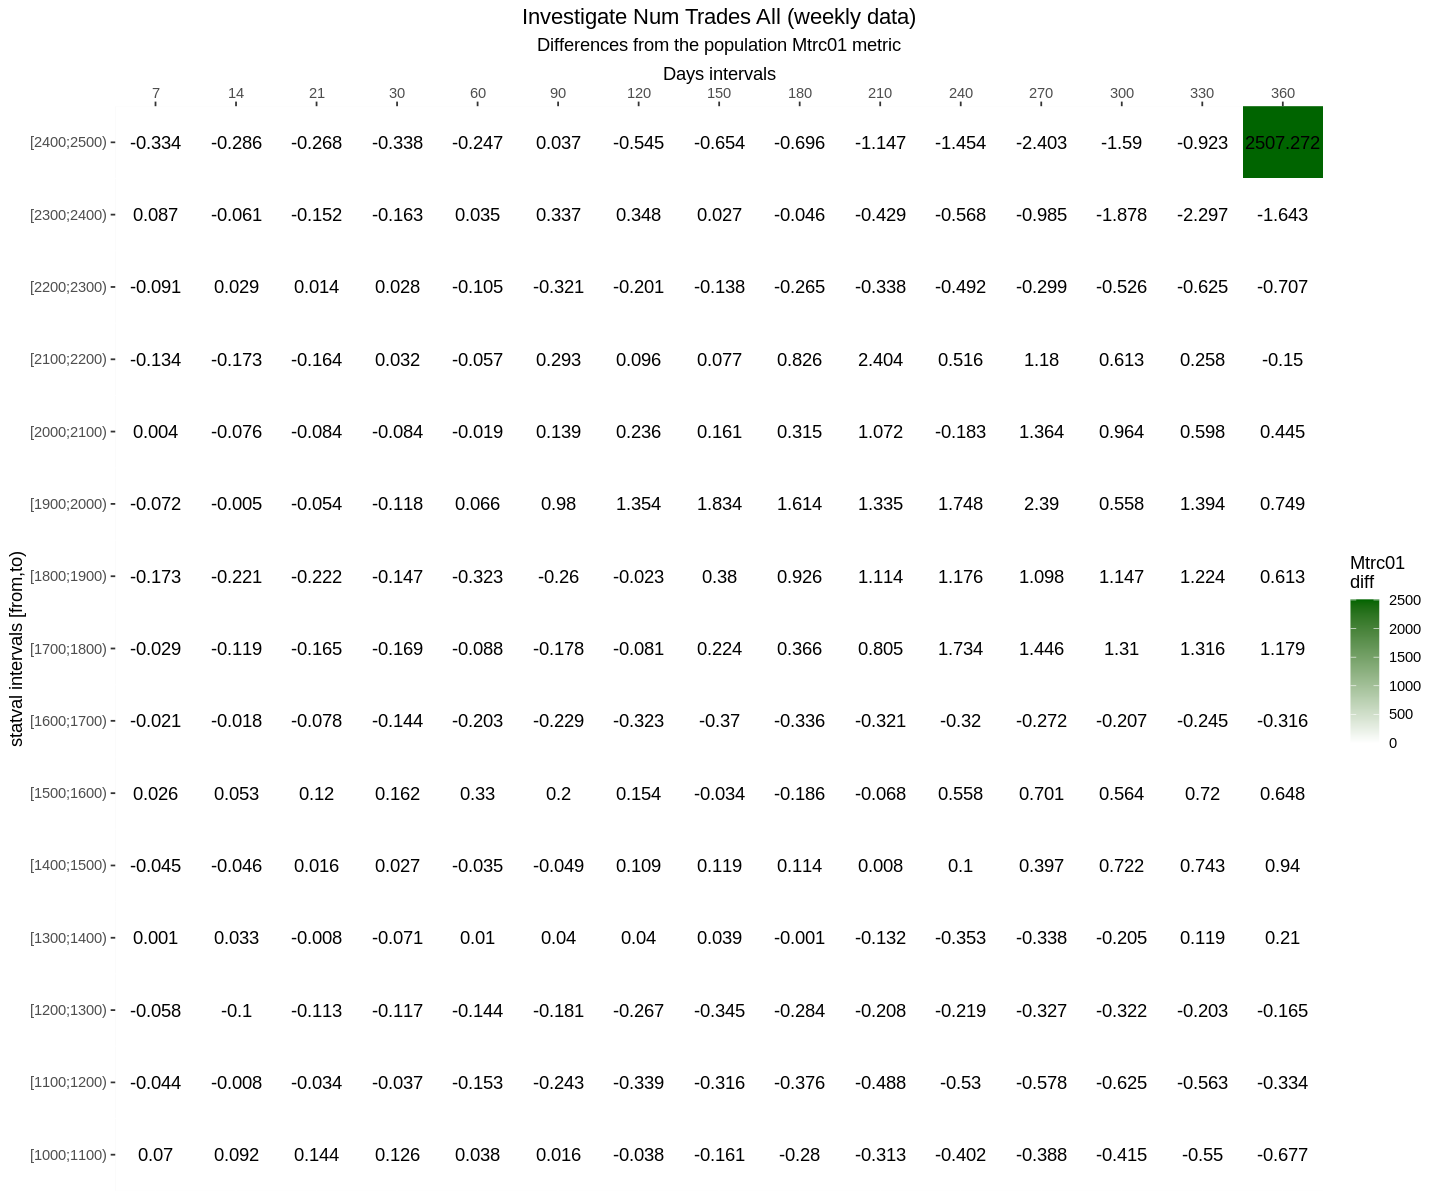

In [16]:
showMetricDifferences(experiment, result)

In [17]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2400 <= statval < 2500,5,5,5,4,3,3,2,2,2,2,2,2,2,2,1
2300 <= statval < 2400,6,6,6,6,4,4,4,2,2,2,2,2,2,2,2
2200 <= statval < 2300,10,8,8,8,5,4,4,4,3,3,3,3,3,3,3
2100 <= statval < 2200,13,13,13,11,11,9,5,4,2,2,2,2,2,2,2
2000 <= statval < 2100,16,15,15,14,13,10,9,8,6,2,2,2,2,2,2
1900 <= statval < 2000,16,15,15,15,14,10,9,8,8,7,5,3,2,2,2
1800 <= statval < 1900,19,19,18,18,16,15,14,12,10,9,8,5,5,4,3
1700 <= statval < 1800,17,17,17,16,15,14,14,12,12,11,8,8,6,5,5
1600 <= statval < 1700,23,21,19,19,17,17,16,16,14,11,10,9,9,9,6


### Discussion
 
From 1000 to 2500 trades.